In [96]:
#imports
import os
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [42]:
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive')
print("Change successful.")

Mounted at /content/drive
Change successful.


In [67]:
data = pd.read_csv('brain_stroke.csv')
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [44]:
data.isna().sum()
#There are no null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [45]:
data.duplicated().sum()
#There are no duplicated rows

0

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [47]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


## 1. Exploratory Data Analysis

* Dataset author comment:
  "This dataset little preprocessed, I dropped outliers and very rare categorical values.
I dropped also the "id" columns. I suggest for this dataset, drop in "age" feature little than 38 years old."
 
*  The top 25% of values for avg_glucose_level is very high 



In [48]:
'''Credits for the function: https://www.kaggle.com/greegtitan'''
def create_comparison_graph(feature: str, bins=2, ticks=True):
    fig, ax = plt.subplots(1, 2, figsize=(7,4), sharey=True, constrained_layout=True)

    fig.suptitle('Stroke patient based on {}'.format(feature), fontsize=16)

    sns.histplot(data[data['stroke'] == 0][feature], bins=bins, ax=ax[0])
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel('No Stroke')
    if bins == 2:
        ax[0].set_xticks([0,1])
    if ticks: ax[0].set_xticklabels(['No', 'Yes'])

    sns.histplot(data[data['stroke'] == 1][feature], bins=bins, ax=ax[1])
    ax[1].set_xlabel('Stroke')
    if bins == 2:
        ax[1].set_xticks([0,1])
    if ticks: ax[1].set_xticklabels(['No', 'Yes'])

    fig.show()

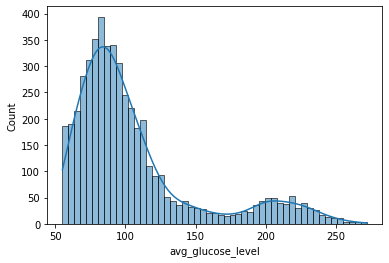

In [49]:
sns.histplot(data=data,x="avg_glucose_level",kde=True)

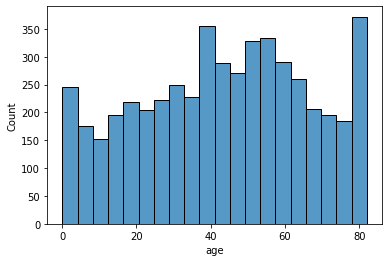

In [50]:
sns.histplot(data=data,x="age")
#The data is most likely sampled from a large population

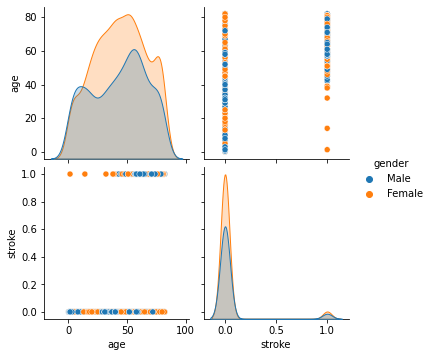

In [51]:
columns=data[["age","gender","stroke"]]
sns.pairplot(columns, hue="gender")
plt.show()
#We can drop the age column

In [68]:
data = data.drop(["age"],axis=1)
data.head(1)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


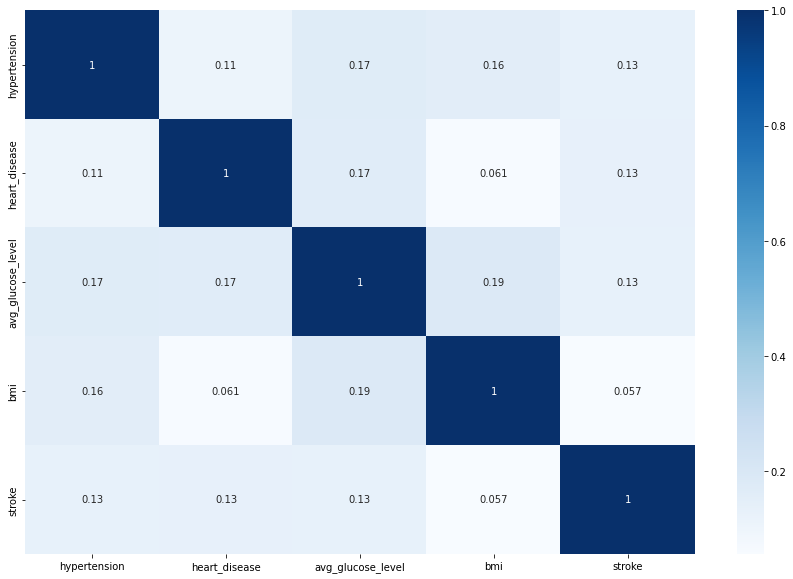

In [53]:
#Display the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

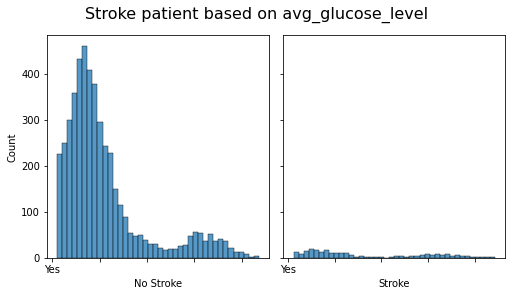

In [54]:
#Relationship between stroke and avg_gluose_level - lower glucose level => lower chance of stroke
create_comparison_graph('avg_glucose_level',40)

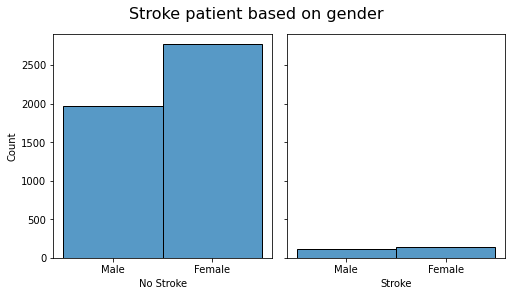

In [55]:
#Relationship between stroke and gender - N/A
create_comparison_graph('gender',ticks=False)

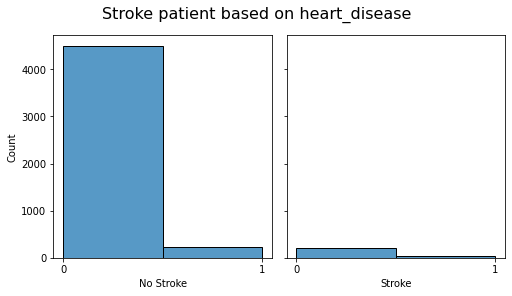

In [56]:
#Relationship between stroke and heart_disease - no heart disease => lower chance of getting stroke
#The conclusion is not confounding  ref: https://www.cdc.gov/stroke/risk_factors.htm#:~:text=Heart%20disease,rich%20blood%20to%20the%20brain.
create_comparison_graph('heart_disease',ticks=False)

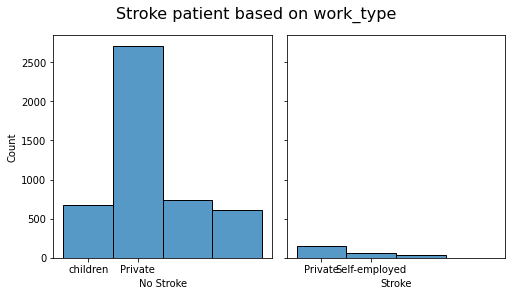

In [57]:
#Relationship between stroke and work_type - confounding?
create_comparison_graph('work_type',ticks=False)

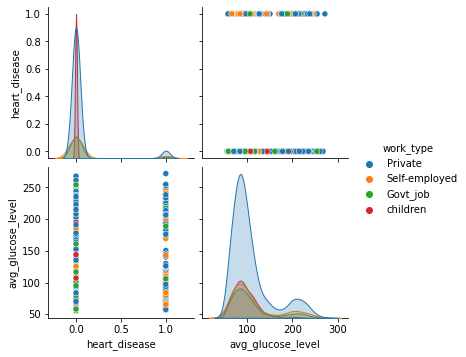

In [61]:
columns = data[["heart_disease","avg_glucose_level","work_type"]]
sns.pairplot(columns,hue="work_type")
plt.show()
#work_type is confounding

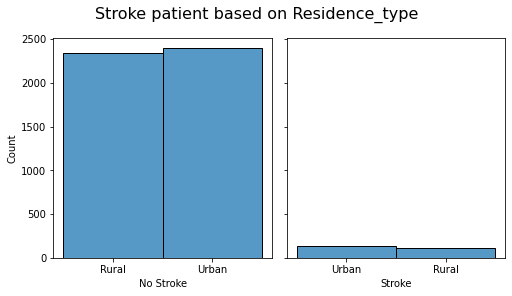

In [63]:
#Relationship between stroke and residence - N/A
create_comparison_graph('Residence_type',ticks=False)

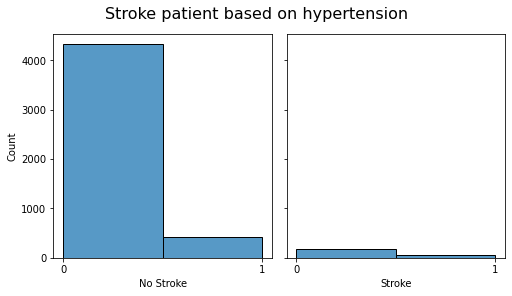

In [64]:
#Relationship between stroke and hypertension - lower hypertension => lower chance of stroke
create_comparison_graph('hypertension',ticks=False)

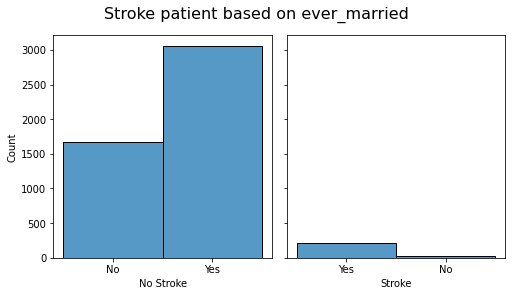

In [66]:
#Relationship between stroke and married status - yes
create_comparison_graph('ever_married',ticks=False)

## 2. Model Training

In [69]:
#drop gender, residence, work_type columns
data = data.drop(["gender","Residence_type","work_type"],axis=1)
data.head(1)

,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,Yes,228.69,36.6,formerly smoked,1


In [70]:
#convert non-object types to categorical values
encoder = LabelEncoder()
data['ever_married'] = encoder.fit_transform(data['ever_married'])
ever_married = {index : label for index, label in enumerate(encoder.classes_)}
data['smoking_status'] = encoder.fit_transform(data['smoking_status'])
smoking_status = {index : label for index, label in enumerate(encoder.classes_)}

In [80]:
x = data.drop('stroke',axis=1)
y = data['stroke']

In [81]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

In [82]:
#train, test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Decison Tree Classifier

In [83]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [84]:
y_predict = dt.predict(x_test)

In [87]:
print("Decision Tree Accuracy:")
print(accuracy_score(y_test,y_predict))

Decision Tree Accuracy:
0.9438314944834504


### Random Forest Classifier

In [88]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [89]:
y_predict = rf.predict(x_test)

In [90]:
print("Random Forest Accuracy:")
print(accuracy_score(y_test,y_predict))

Decision Tree Accuracy:
0.9468405215646941


### SVM based classifier

In [91]:
svc = SVC(kernel='rbf', gamma=1, C=2)
svc.fit(x_train, y_train)

SVC(C=2, gamma=1)

In [92]:
y_predict = svc.predict(x_test)

In [93]:
print("SVC Accuracy:")
print(accuracy_score(y_test,y_predict))

SVC Accuracy:
0.9428284854563691


### XGBoost Classifier

In [98]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,random_state=0, learning_rate=0.1)
result=cross_val_score(xgboost,x,y,cv=10,scoring='accuracy')
print('XGBoost Accuracy:',result.mean())

XGBoost Accuracy: 0.9459935936129286
